In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DimitraGiannouli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DimitraGiannouli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DimitraGiannouli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [7]:
train_data = pd.read_csv('train.csv/train.csv')
train_data.set_index('row_id',inplace=True)
train_data.tail()

,date,country,store,product,num_sold
row_id,,,,,
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135
70127,2020-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,202


In [8]:
null_values = train_data.isnull().sum()
null_values

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [9]:
na_values = train_data.isna().sum()
na_values

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [35]:
train_data['date'] = pd.to_datetime(train_data['date'])
year_data = train_data['date'].dt.to_period('Y')
train_data['year'] = year_data
year_country_data = train_data.groupby(['year','country'], as_index=False)['num_sold'].sum()
data = train_data.groupby(['year'], as_index=False)['num_sold'].sum()
country_data = train_data.groupby(['country'], as_index=False)['num_sold'].sum()
country_product_data = train_data.groupby(['country','product'], as_index=False)['num_sold'].sum()

Text(0, 0.5, 'Books sold')

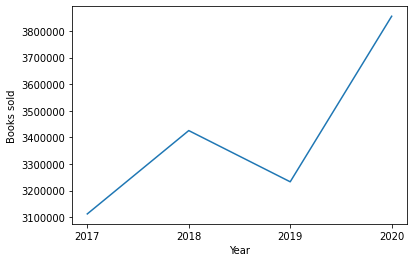

In [16]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data, x=data['year'].astype(str),y='num_sold')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Books sold')

Books sold per country

Text(0, 0.5, 'Books sold')

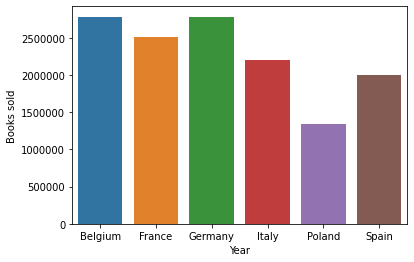

In [20]:
sns.barplot(data=country_data, x=country_data['country'],y='num_sold')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Country')
plt.ylabel('Books sold')

Books sold per country and year

Text(0, 0.5, 'Books sold')

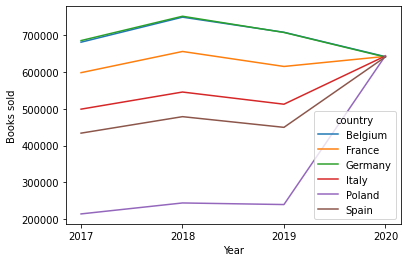

In [30]:
sns.lineplot(data=year_country_data, x=year_country_data['year'].astype(str),y='num_sold',hue='country')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Books sold')

Books sold per product and country

Text(0, 0.5, 'Books sold')

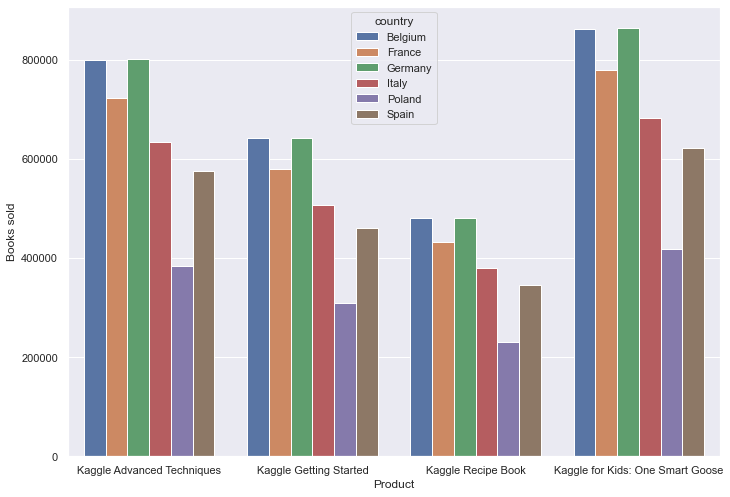

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=country_product_data, x=country_product_data['product'],y='num_sold',hue='country')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Product')
plt.ylabel('Books sold')
